# Dimensionality Reduction

In [2]:
import pandas as pd

In [5]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.head())
pokemon.shape

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


(800, 13)

# Which clolumns have little variance

In [10]:
pokemon.describe().round(2)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00
mean,362.81,435.10,69.26,79.00,73.84,72.82,71.90,68.28,3.32
std,208.34,119.96,25.53,32.46,31.18,32.72,27.83,29.06,1.66
min,1.00,180.00,1.00,5.00,5.00,10.00,20.00,5.00,1.00
25%,184.75,330.00,50.00,55.00,50.00,49.75,50.00,45.00,2.00
50%,364.50,450.00,65.00,75.00,70.00,65.00,70.00,65.00,3.00
75%,539.25,515.00,80.00,100.00,90.00,95.00,90.00,90.00,5.00
max,721.00,780.00,255.00,190.00,230.00,194.00,230.00,180.00,6.00


In [11]:
# Summary statistics for non numeric data
pokemon.describe(exclude = 'number')

,Name,Type 1,Type 2,Legendary
count,800,800,414,800
unique,800,18,18,2
top,Eevee,Water,Flying,False
freq,1,112,97,735


# Remove features without variance

In [15]:
# Remove the feature without variance from this list
number_cols = ['HP','Attack','Defense']

# Leave this list as is for now
non_number_cols = ['Name', 'Type 1']

# Sub-select by combining the lists with chosen features
df_selected = pokemon[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

   HP  Attack  Defense                   Name Type 1
0  45      49       49              Bulbasaur  Grass
1  60      62       63                Ivysaur  Grass
2  80      82       83               Venusaur  Grass
3  80     100      123  VenusaurMega Venusaur  Grass
4  39      52       43             Charmander   Fire


# Feature Selection vs Feature Extraction

In [5]:
ansur_df_1 = pd.read_csv('ANSUR_Male.csv')
ansur_df_2 = pd.read_csv('ANSUR_Female.csv')
print(ansur_df_1.head())
ansur_df_1.shape

   Branch               Component        Gender  \
0       0             Combat Arms  Regular Army   
1       1          Combat Support  Regular Army   
2       2          Combat Support  Regular Army   
3       3  Combat Service Support  Regular Army   
4       4  Combat Service Support  Regular Army   

  abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                           Male             266                   1467   
1                           Male             233                   1395   
2                           Male             287                   1430   
3                           Male             234                   1347   
4                           Male             250                   1585   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 337           222                     1347   
1                 326           220                     1293   
2                 341           230               

(4082, 100)

In [30]:
# list(data) or 
list(ansur_df_1.columns) 

['Branch',
 'Component',
 'Gender',
 'abdominalextensiondepthsitting',
 'acromialheight',
 'acromionradialelength',
 'anklecircumference',
 'axillaheight',
 'balloffootcircumference',
 'balloffootlength',
 'biacromialbreadth',
 'bicepscircumferenceflexed',
 'bicristalbreadth',
 'bideltoidbreadth',
 'bimalleolarbreadth',
 'bitragionchinarc',
 'bitragionsubmandibulararc',
 'bizygomaticbreadth',
 'buttockcircumference',
 'buttockdepth',
 'buttockheight',
 'buttockkneelength',
 'buttockpopliteallength',
 'calfcircumference',
 'cervicaleheight',
 'chestbreadth',
 'chestcircumference',
 'chestdepth',
 'chestheight',
 'crotchheight',
 'crotchlengthomphalion',
 'crotchlengthposterioromphalion',
 'earbreadth',
 'earlength',
 'earprotrusion',
 'elbowrestheight',
 'eyeheightsitting',
 'footbreadthhorizontal',
 'footlength',
 'forearmcenterofgriplength',
 'forearmcircumferenceflexed',
 'forearmforearmbreadth',
 'forearmhandlength',
 'functionalleglength',
 'handbreadth',
 'handcircumference',
 'ha

# Visualization of correlation for redundant features

In [27]:
# Remove the feature without variance from this list
keep = ['Gender','weight_kg','stature_m','wristheight']

# Sub-select by combining the lists with chosen features
ansur_df_1s = ansur_df_1[keep]
ansur_df_1s.head()

,Gender,weight_kg,stature_m,wristheight
0,Regular Army,853,81.5,175
1,Regular Army,815,72.6,167
2,Regular Army,831,92.9,180
3,Regular Army,793,79.4,176
4,Regular Army,954,94.6,188


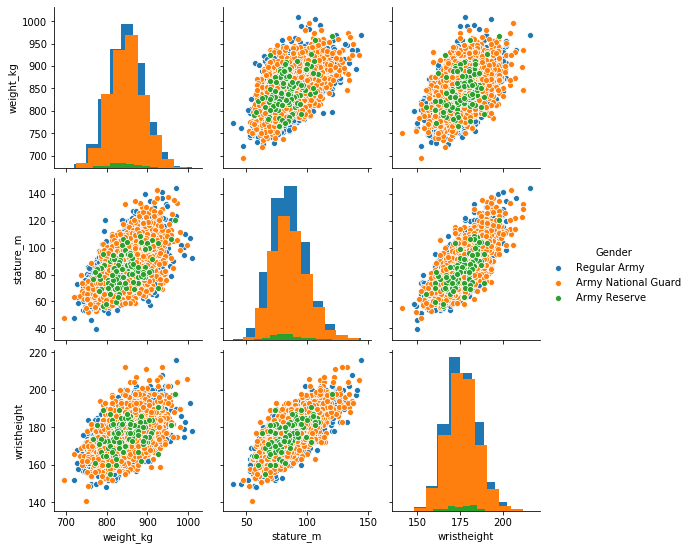

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1s, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

# Remove information

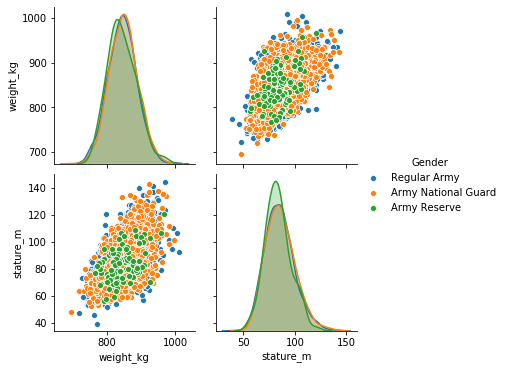

In [31]:
# Remove one of the redundant features 
reduced_df = ansur_df_1s.drop('wristheight', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

# Show the plot
plt.show()

# T-Distributed Stocastic Neighbor Embedding (t-SNE)
To visualize high demensional data for feature extraction

In [49]:
ansur_df_2.head()
ansur_df_2.shape

(1986, 100)

# Remove non numeric columns

In [50]:
remove = ['BMI_class', 'Height_class','Gender', 'Component','Branch','abdominalextensiondepthsitting','Unnamed: 99']
df_numeric = ansur_df_2.drop(remove, axis = 1) # axis =1 means remove columns not rows
df_numeric.head()

,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,231,1282,301,204,1180,222,177,373,315,263,...,406,295,850,217,345,942,152,756,65.7,1.560
1,194,1379,320,207,1292,225,178,372,272,250,...,422,254,708,168,329,1032,155,815,53.4,1.665
2,183,1369,329,233,1271,237,196,397,300,276,...,419,269,727,159,367,1035,162,799,66.3,1.711
3,261,1356,306,214,1250,240,188,384,364,276,...,451,302,923,235,371,999,173,818,78.2,1.660
4,309,1303,308,214,1210,217,182,378,320,336,...,452,405,1163,300,380,911,152,762,88.6,1.572


# t-(SNE) doesnt use categorical
could do one hot encoding but not this time

In [52]:
from sklearn.manifold import TSNE

# high learning rate makes algorith more adventureous 
m = TSNE(learning_rate = 50)

# fit model
tsne_features = m.fit_transform(df_numeric)

# fit high demensional datafram onto array of two dimensions
tsne_features[1:4,:]

array([[ 21.875565 , -32.374046 ],
       [  3.2128444, -32.64717  ],
       [-22.68157  , -15.454868 ]], dtype=float32)

In [43]:
# assign two dimensions back to origional dataset named x and y
df_numeric['x'] = tsne_features[:,0]
df_numeric['y'] = tsne_features[:,1]

In [47]:
df_numeric.head()

,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,x,y
0,231,1282,301,204,1180,222,177,373,315,263,...,850,217,345,942,152,756,65.7,1.560,-18.804857,-8.454422
1,194,1379,320,207,1292,225,178,372,272,250,...,708,168,329,1032,155,815,53.4,1.665,32.850525,-18.840586
2,183,1369,329,233,1271,237,196,397,300,276,...,727,159,367,1035,162,799,66.3,1.711,31.632481,-0.932421
3,261,1356,306,214,1250,240,188,384,364,276,...,923,235,371,999,173,818,78.2,1.660,13.165067,22.963175
4,309,1303,308,214,1210,217,182,378,320,336,...,1163,300,380,911,152,762,88.6,1.572,-8.355237,38.420750


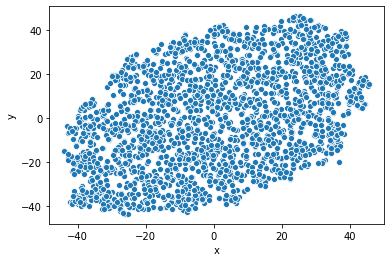

In [45]:
sns.scatterplot(x="x", y="y", data = df_numeric)
plt.show()
# more continuous thus one cluster for weight and height
# BMI is used to distinguish regardless of height

# BMI is used to distinguish regardless of height

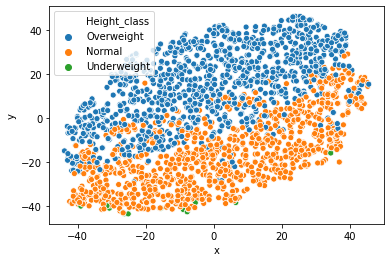

In [48]:
df_numeric['Height_class'] = ansur_df_2['Height_class']
sns.scatterplot(x="x", y="y", hue = 'Height_class',data = df_numeric)
plt.show()

# Curse of dimensionality
High demensionality datasets fit badly (underfit)

In [77]:
# Remove non numeric columns unless want to do one hot encoding but not now
remove = ['BMI_class', 'Height_class', 'Component','Branch','abdominalextensiondepthsitting','Unnamed: 99']

df_numeric = ansur_df1.drop(remove, axis = 1) # axis =1 means remove columns not rows
df_numeric.head()

,Gender,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,Regular Army,266,1467,337,222,1347,253,202,401,369,...,501,329,933,240,440,1054,175,853,81.5,1.776
1,Regular Army,233,1395,326,220,1293,245,193,394,338,...,432,316,870,225,371,1054,167,815,72.6,1.702
2,Regular Army,287,1430,341,230,1327,256,196,427,408,...,472,329,964,255,411,1041,180,831,92.9,1.735
3,Regular Army,234,1347,310,230,1239,262,199,401,359,...,461,315,857,205,399,968,176,793,79.4,1.655
4,Regular Army,250,1585,372,247,1478,267,224,435,356,...,467,303,868,214,379,1245,188,954,94.6,1.914


In [78]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = df_numeric['Gender']

# Remove the Gender column to create the training data
X = df_numeric.drop('Gender', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

1225 rows in test set vs. 2857 in training set. 93 Features.


# Implement SVM

In [79]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

51.2% accuracy on test set vs. 52.3% on training set


# Accuracy after dimensionality reduction is much better....
Creating a feature selector
First remove character columns

In [87]:
remove = ['Gender']
df_numeric2 = df_numeric.drop(remove, axis = 1) # axis =1 means remove columns not rows
df_numeric2.head()

,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,266,1467,337,222,1347,253,202,401,369,274,...,501,329,933,240,440,1054,175,853,81.5,1.776
1,233,1395,326,220,1293,245,193,394,338,257,...,432,316,870,225,371,1054,167,815,72.6,1.702
2,287,1430,341,230,1327,256,196,427,408,261,...,472,329,964,255,411,1041,180,831,92.9,1.735
3,234,1347,310,230,1239,262,199,401,359,262,...,461,315,857,205,399,968,176,793,79.4,1.655
4,250,1585,372,247,1478,267,224,435,356,263,...,467,303,868,214,379,1245,188,954,94.6,1.914


In [88]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = 1) # set threshold
sel.fit(df_numeric2) # fit selector to dataframe
mask = sel.get_support()
print(mask)  # use this to reduce dimensions

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False]


In [89]:
reduced_df = df_numeric2.loc[:, mask]
print(reduced_df.shape)

(4082, 92)


# Normalize the variance

In [91]:
sel = VarianceThreshold(threshold = 0.005) # set threshold
sel.fit(df_numeric2 / df_numeric2.mean()) # fit selector to dataframe
mask = sel.get_support()
reduced_df = df_numeric2.loc[:, mask]
print(reduced_df.shape) # Dramatically reduced dataframe

(4082, 26)


In [94]:
list(ansur_df_2.columns)

['Branch',
 'Component',
 'Gender',
 'abdominalextensiondepthsitting',
 'acromialheight',
 'acromionradialelength',
 'anklecircumference',
 'axillaheight',
 'balloffootcircumference',
 'balloffootlength',
 'biacromialbreadth',
 'bicepscircumferenceflexed',
 'bicristalbreadth',
 'bideltoidbreadth',
 'bimalleolarbreadth',
 'bitragionchinarc',
 'bitragionsubmandibulararc',
 'bizygomaticbreadth',
 'buttockcircumference',
 'buttockdepth',
 'buttockheight',
 'buttockkneelength',
 'buttockpopliteallength',
 'calfcircumference',
 'cervicaleheight',
 'chestbreadth',
 'chestcircumference',
 'chestdepth',
 'chestheight',
 'crotchheight',
 'crotchlengthomphalion',
 'crotchlengthposterioromphalion',
 'earbreadth',
 'earlength',
 'earprotrusion',
 'elbowrestheight',
 'eyeheightsitting',
 'footbreadthhorizontal',
 'footlength',
 'forearmcenterofgriplength',
 'forearmcircumferenceflexed',
 'forearmforearmbreadth',
 'forearmhandlength',
 'functionalleglength',
 'handbreadth',
 'handcircumference',
 'ha

# Make new dataframe on the head columns

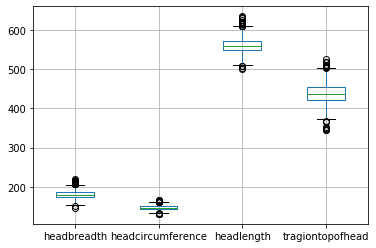

In [97]:
head_df = ansur_df_2[['headbreadth','headcircumference','headlength','tragiontopofhead']]
# Create the boxplot
head_df.boxplot()

plt.show()

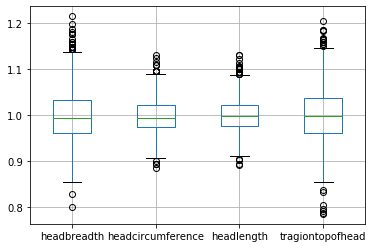

In [98]:
# Normalize the data
normalized_df = head_df / head_df.mean()

normalized_df.boxplot()
plt.show()

In [99]:
# Print the variances of the normalized data
print(normalized_df.var())

headbreadth          0.003084
headcircumference    0.001234
headlength           0.001191
tragiontopofhead     0.003273
dtype: float64


# Remove some very low variance

In [101]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.0013)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 4 to 2.


# Removing features with many missing values

In [103]:
school_df = pd.read_csv('Boston_Public_School.csv')
school_df.head()

,x,y,objectid_1,objectid,bldg_id,bldg_name,address,city,zipcode,csp_sch_id,...,sch_name,sch_label,sch_type,shared,complex,label,tlt,pl,point_x,point_y
0,-71.004121,42.388799,1,1,1,Guild Bldg,195 Leyden Street,East Boston,2128,4061,...,Guild Elementary,Guild,ES,NaN,NaN,52,3,Grace,790128.152748,2.967094e+06
1,-71.030480,42.378545,2,2,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,2128,4541,...,Kennedy Patrick Elem,PJ Kennedy,ES,NaN,NaN,72,3,Grace,783027.745829,2.963318e+06
2,-71.033891,42.375279,3,3,4,Otis Bldg,218 Marion Street,East Boston,2128,4322,...,Otis Elementary,Otis,ES,NaN,NaN,106,3,Grace,782112.823908,2.962122e+06
3,-71.038011,42.378089,4,4,6,Odonnell Bldg,33 Trenton Street,East Boston,2128,4543,...,O'Donnell Elementary,O'Donnell,ES,NaN,NaN,103,3,Grace,780994.000003,2.963140e+06
4,-71.034921,42.380957,5,5,7,East Boston High Bldg,86 White Street,East Boston,2128,1070,...,East Boston High,East Boston HS,HS,NaN,NaN,36,2,Joel,781823.000004,2.964190e+06


In [108]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5
# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


# Pairwise correlation

In [116]:
import numpy as np

In [112]:
ansur_df = ansur_df_2[['elbowrestheight',  'wristcircumference',  'anklecircumference',  'buttockheight',  'crotchheight']]
ansur_df.head()

,elbowrestheight,wristcircumference,anklecircumference,buttockheight,crotchheight
0,16,942,301,223,1095
1,23,1032,320,186,1234
2,26,1035,329,204,1226
3,22,999,306,253,1170
4,18,911,308,284,1112


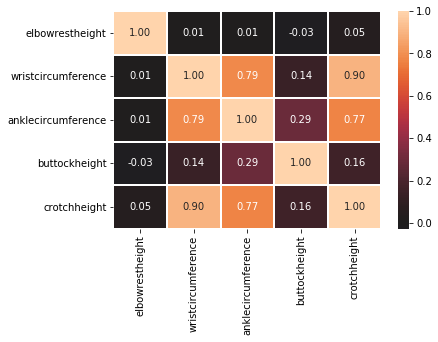

In [114]:
# Create the correlation matrix
corr = ansur_df.corr()

# Draw the heatmap
sns.heatmap(corr, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [117]:
# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

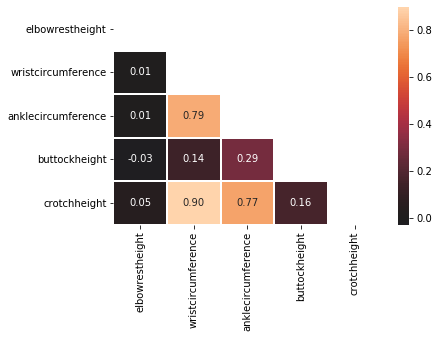

In [119]:
# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

# Removing highly correlated features

In [124]:
df_numeric2.shape

(4082, 93)

In [123]:
# Originally the dataframe has 93 columns

# Calculate the correlation matrix and take the absolute value
corr_matrix = df_numeric2.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

# Drop the features in the to_drop list
reduced_df = df_numeric2.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

The reduced_df dataframe has 82 columns


# Pick variables based on model performance
Features with coeficients close to 0 will contribute little to model output

In [14]:
dfs = pd.read_csv('Diabetes.csv')
list(dfs.columns)
dfs.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age,test
0,1,89,66,23,94,28.1,0.167,21,negative
1,0,137,40,35,168,43.1,2.288,33,positive
2,3,78,50,32,88,31.0,0.248,26,positive
3,2,197,70,45,543,30.5,0.158,53,positive
4,1,189,60,23,846,30.1,0.398,59,positive


In [24]:
# Import train_test_split()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select the Gender column as the feature to be predicted (y)
y = dfs['test']

# Remove the Gender column to create the training data
X = dfs.drop('test', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

118 rows in test set vs. 274 in training set. 8 Features.


In [25]:
#Create scaler function
scaler = StandardScaler()

# Create logistic regression function

lr = LogisticRegression()

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

72.9% accuracy on test set.
{'pregnant': 0.2, 'glucose': 1.21, 'diastolic': 0.03, 'triceps': 0.01, 'insulin': 0.09, 'bmi': 0.68, 'family': 0.35, 'age': 0.35}


# Manual Recursive Feature Elimination
remove features with lowest model coefficent

In [30]:
# rename dataframe for simplicity
diabetes_df = dfs

# Remove the 2 features with the lowest model coefficients
X = diabetes_df[['pregnant','glucose', 'triceps', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

79.6% accuracy on test set.
{'pregnant': 0.07, 'glucose': 1.13, 'triceps': 0.25, 'bmi': 0.35, 'family': 0.34, 'age': 0.33}


In [31]:
# Import feature selection
from sklearn.feature_selection import RFE

# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# Fit the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 

Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'pregnant': 4, 'glucose': 2, 'triceps': 3, 'bmi': 1, 'family': 1, 'age': 1}
Index(['bmi', 'family', 'age'], dtype='object')
72.4% accuracy on test set.


# Tree based feature selection

In [32]:
from sklearn.ensemble import RandomForestClassifier

#Train x and y using rf now
rf = RandomForestClassifier()

# Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Calculate the test set accuracy
acc = accuracy_score(y_test, rf.predict(X_test))

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print("{0:.1%} accuracy on test set.".format(acc))  

{'pregnant': 0.07, 'glucose': 0.35, 'triceps': 0.12, 'bmi': 0.15, 'family': 0.16, 'age': 0.14}
78.6% accuracy on test set.


In [33]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Apply the mask to the feature dataset X
reduced_X = X.loc[:, mask]

# prints out the selected column names
print(reduced_X.columns)

Index(['glucose', 'bmi', 'family'], dtype='object')


# Recursive Feature Elimination

In [34]:
# Wrap the feature eliminator around the random forest model
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask using an attribute of rfe
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Index(['glucose', 'bmi'], dtype='object')


# Regularized linear regression
Reduce dimensionality using regression

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [56]:
df_new = ansur_df_1
# Remove non numeric columns unless want to do one hot encoding but not now
remove = ['BMI_class', 'Height_class', 'Component','Branch','abdominalextensiondepthsitting','Unnamed: 99','Gender','weight_kg']

df_new2 = df_new.drop(remove, axis = 1) # axis =1 means remove columns not rows
df_new2.head()

,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,...,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,stature_m,BMI
0,266,1467,337,222,1347,253,202,401,369,274,...,1700,501,329,933,240,440,1054,175,81.5,1.776
1,233,1395,326,220,1293,245,193,394,338,257,...,1627,432,316,870,225,371,1054,167,72.6,1.702
2,287,1430,341,230,1327,256,196,427,408,261,...,1678,472,329,964,255,411,1041,180,92.9,1.735
3,234,1347,310,230,1239,262,199,401,359,262,...,1625,461,315,857,205,399,968,176,79.4,1.655
4,250,1585,372,247,1478,267,224,435,356,263,...,1679,467,303,868,214,379,1245,188,94.6,1.914


In [57]:
# Select the Gender column as the feature to be predicted (y)
y = df_new2['BMI']

# Remove the Gender column to create the training data
X = df_new2.drop('BMI', axis=1)

In [58]:
# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Create the Lasso model 
la = Lasso()

# Fit it to the standardized training data
la.fit(X_train_std, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict -0.0% of the variance in the test set.
The model has ignored 91 out of 91 features.


# Adjusting regularization strenght

In [60]:
# Find the highest alpha value with R-squared above 98%
la = Lasso(alpha=0.1, random_state=0)

# Fits the model and calculates performance stats
la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats 
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))

The model can predict -0.0% of the variance in the test set.
91 out of 91 features were ignored.


# Creating LassoCV regressor

In [63]:
from sklearn.linear_model import LassoCV

# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

Optimal alpha = 0.005
The model explains 99.3% of the test set variance
31 features out of 91 selected


# RFE with GBM

In [64]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
gb_mask = rfe_gb.support_

Fitting estimator with 91 features.
Fitting estimator with 88 features.
Fitting estimator with 85 features.
Fitting estimator with 82 features.
Fitting estimator with 79 features.
Fitting estimator with 76 features.
Fitting estimator with 73 features.
Fitting estimator with 70 features.
Fitting estimator with 67 features.
Fitting estimator with 64 features.
Fitting estimator with 61 features.
Fitting estimator with 58 features.
Fitting estimator with 55 features.
Fitting estimator with 52 features.
Fitting estimator with 49 features.
Fitting estimator with 46 features.
Fitting estimator with 43 features.
Fitting estimator with 40 features.
Fitting estimator with 37 features.
Fitting estimator with 34 features.
Fitting estimator with 31 features.
Fitting estimator with 28 features.
Fitting estimator with 25 features.
Fitting estimator with 22 features.
Fitting estimator with 19 features.
Fitting estimator with 16 features.
Fitting estimator with 13 features.
The model can explain 98.7% 

# RFE with Random Forest

In [65]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
rf_mask = rfe_rf.support_

Fitting estimator with 91 features.
Fitting estimator with 88 features.
Fitting estimator with 85 features.
Fitting estimator with 82 features.
Fitting estimator with 79 features.
Fitting estimator with 76 features.
Fitting estimator with 73 features.
Fitting estimator with 70 features.
Fitting estimator with 67 features.
Fitting estimator with 64 features.
Fitting estimator with 61 features.
Fitting estimator with 58 features.
Fitting estimator with 55 features.
Fitting estimator with 52 features.
Fitting estimator with 49 features.
Fitting estimator with 46 features.
Fitting estimator with 43 features.
Fitting estimator with 40 features.
Fitting estimator with 37 features.
Fitting estimator with 34 features.
Fitting estimator with 31 features.
Fitting estimator with 28 features.
Fitting estimator with 25 features.
Fitting estimator with 22 features.
Fitting estimator with 19 features.
Fitting estimator with 16 features.
Fitting estimator with 13 features.
The model can explain 98.4% 

In [69]:
import numpy as np
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]

# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print('The model can explain {0:.1%} of the variance in the test set using {1:} features.'.format(r_squared, len(lm.coef_)))

The model can explain 99.0% of the variance in the test set using 7 features.


# Feature Extraction
Manual extraction

In [3]:
sales_df = pd.read_csv("grocery_store_sales.csv")
sales_df.head()

,storeID,product,quantity,revenue
0,A,Apples,1811,9300.6
1,A,Bananas,1003,3375.2
2,A,Oranges,1604,8528.5
3,B,Apples,1785,9181.0
4,B,Bananas,944,3680.2


In [4]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['revenue', 'quantity'], axis=1)

print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


In [ ]:
# Calculate the mean height
height_df['height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis=1)

# Drop the 3 original height features
reduced_df = height_df.drop(['height_1', 'height_2', 'height_3'], axis=1)

print(reduced_df.head())

# Principal Component Analysis

In [10]:
ansur_df = ansur_df_1[['acromialheight','wristheight','axillaheight','trochanterionheight']]

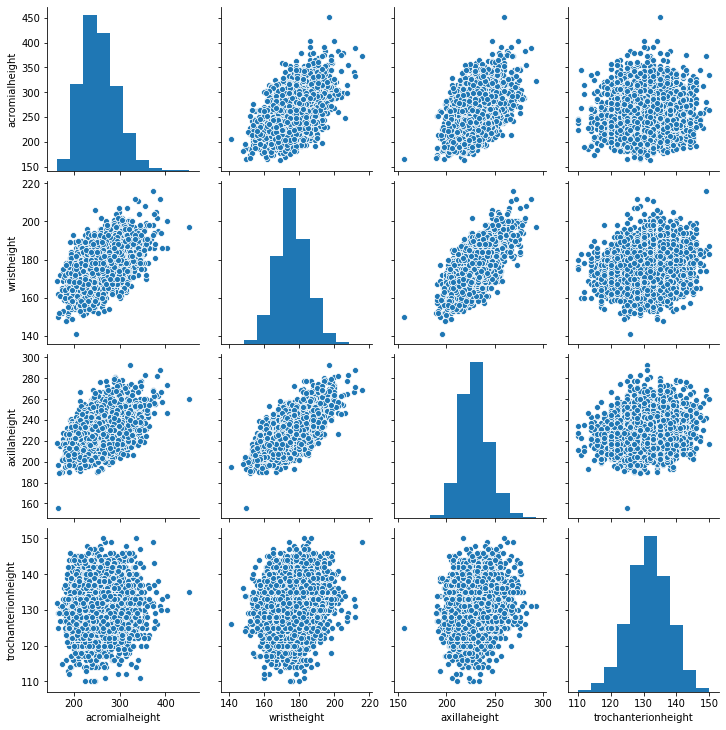

In [11]:
# Create a pairplot to inspect ansur_df
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(ansur_df)

plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)

# This changes the numpy array output back to a dataframe
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

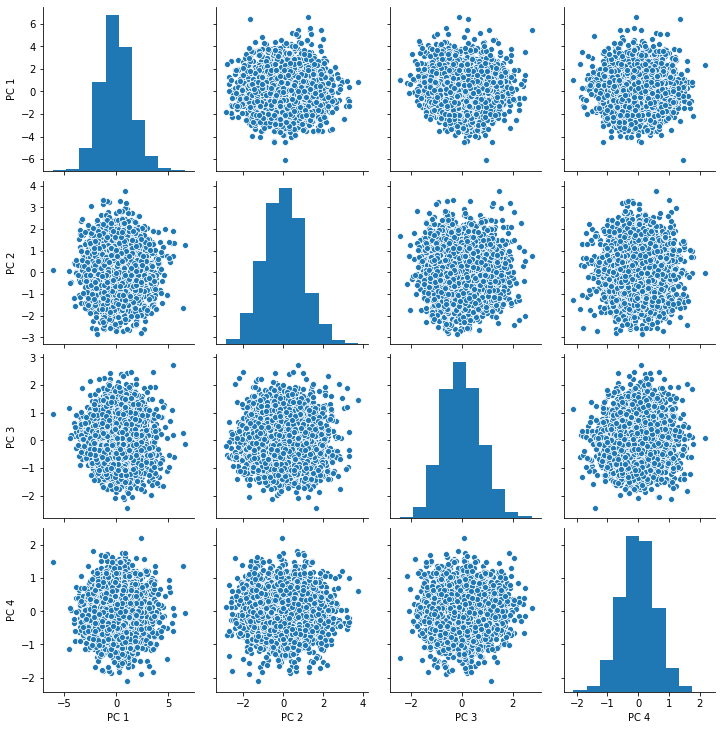

In [14]:
# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)
plt.show()

# PCA on larger dataset

In [20]:
ansur_df = ansur_df_1[['acromialheight','wristheight','axillaheight','trochanterionheight','elbowrestheight',  'wristcircumference',  'anklecircumference',  'buttockheight',  'crotchheight','chestheight','tibialheight','sittingheight','cervicaleheight']]
ansur_df.shape

(4082, 13)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [22]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_) # 40 percent of variance explained by 1st principle

[0.40662507 0.21147124 0.08338724 0.07053212 0.06337803 0.05047586
 0.02913068 0.0251389  0.0178768  0.01585461 0.01127778 0.0101983
 0.00465337]


In [23]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())
#70% of variance explained withthe first 3 principles

[0.40662507 0.61809631 0.70148355 0.77201567 0.83539369 0.88586955
 0.91500023 0.94013914 0.95801594 0.97387055 0.98514833 0.99534663
 1.        ]


# Understanding components

In [29]:
pokemon = pd.read_csv('pokemon.csv')
poke_df = pokemon[['HP','Attack','Defense','Sp. Atk','Sp. Def', 'Speed']]

In [46]:
poke_cat_df = pokemon[['Type 1','Legendary']]

In [39]:
from sklearn.pipeline import Pipeline

# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
('reducer', PCA(n_components=2))])

In [40]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe.steps[1][1].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.34}
PC 2 effects = {'HP': 0.08, 'Attack': -0.01, 'Defense': 0.63, 'Sp. Atk': -0.31, 'Sp. Def': 0.24, 'Speed': -0.67}


# PCA for feature exploration

In [41]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

print(pc)

[[-1.5563747  -0.02148212]
 [-0.36286656 -0.05026854]
 [ 1.28015158 -0.06272022]
 ...
 [ 2.45821626 -0.51588158]
 [ 3.5303971  -0.95106516]
 [ 2.23378629  0.53762985]]


In [47]:
#poke_cat_df = pd.DataFrame()
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

print(poke_cat_df.head())

  Type 1  Legendary      PC 1      PC 2
0  Grass      False -1.556375 -0.021482
1  Grass      False -0.362867 -0.050269
2  Grass      False  1.280152 -0.062720
3  Grass      False  2.620916  0.704263
4   Fire      False -1.758284 -0.706179


C:\Users\blake\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\blake\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


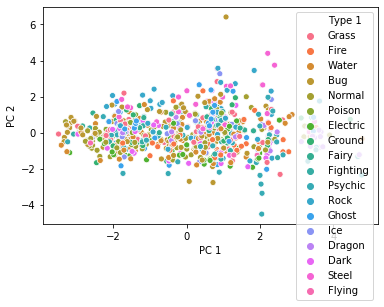

In [49]:
# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Type 1')
plt.show()

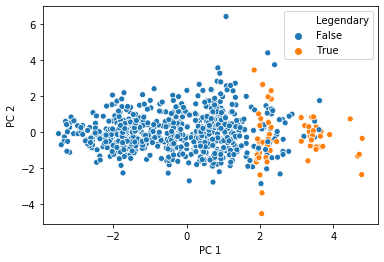

In [50]:
# Use the Legendary feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()

# PCA in model Pipeline

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

In [59]:
poke_df = pokemon[['HP','Attack','Defense','Sp. Atk','Sp. Def', 'Speed','Legendary']]
poke_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,45,49,49,65,65,45,False
1,60,62,63,80,80,60,False
2,80,82,83,100,100,80,False
3,80,100,123,122,120,80,False
4,39,52,43,60,50,65,False


In [60]:
# Select the Gender column as the feature to be predicted (y)
y = poke_df['Legendary']

# Remove the Gender column to create the training data
X = poke_df.drop('Legendary', axis=1)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [64]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

In [65]:
# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Prints the explained variance ratio
print(pipe.steps[1][1].explained_variance_ratio_)

[0.45673596 0.18599109]


In [66]:
# Prints the explained variance ratio
print(pipe.steps[1][1].explained_variance_ratio_)

[0.45673596 0.18599109]


In [67]:
# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print('{0:.1%} test set accuracy'.format(accuracy))

92.1% test set accuracy


In [68]:
# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.45673596 0.18599109]
92.1% test set accuracy


# Principle component selection

In [71]:
ansur_df_2 = pd.read_csv('ANSUR_Female.csv')
# Remove non numeric columns unless want to do one hot encoding but not now
remove = ['BMI_class', 'Height_class', 'Component','Branch','abdominalextensiondepthsitting','Unnamed: 99','Gender','weight_kg']

ansur_df = ansur_df_2.drop(remove, axis = 1) # axis =1 means remove columns not rows
ansur_df.head()

,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,...,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,stature_m,BMI
0,231,1282,301,204,1180,222,177,373,315,263,...,1488,406,295,850,217,345,942,152,65.7,1.560
1,194,1379,320,207,1292,225,178,372,272,250,...,1470,422,254,708,168,329,1032,155,53.4,1.665
2,183,1369,329,233,1271,237,196,397,300,276,...,1542,419,269,727,159,367,1035,162,66.3,1.711
3,261,1356,306,214,1250,240,188,384,364,276,...,1627,451,302,923,235,371,999,173,78.2,1.660
4,309,1303,308,214,1210,217,182,378,320,336,...,1698,452,405,1163,300,380,911,152,88.6,1.572


In [72]:
# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),('reducer', PCA(n_components=0.8))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

11 components selected


In [73]:
# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

23 components selected


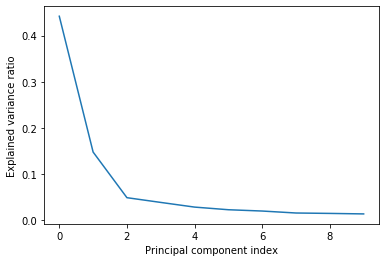

In [74]:
# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(ansur_df)

# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()